# Visualizing the Complex Discrete Fourier Transform
The discrete Fourier transform maps a complex sequence $z_k = x_k + iy_k, \, k = 0, \ldots, n-1$ to another sequence $a_m \in \mathbb{C}, m = 0, \ldots, n-1$ that represents $z_k$ as a composition complex sinusoidals with different frequencies.

Recall that for $w\in\mathbb{C}$, $\exp(iw) = \cos(w) + i\sin(w)$

The Fourier series of the sequence $z_k$ are the complex numbers $a_m \in \mathbb{C}$, $m = 0,\ldots n-1$ such that

$$
z_k = \frac{1}{n}\sum_{m = 0}^{n-1} a_m \exp\left\{2\pi i \frac{mk}{n} \right\}, \quad k = 0, \ldots, n-1
$$

That is, the $a_m$ are the coordinates of the $\left\{\Psi_m(k) = \exp\left\{2\pi i \frac{mk}{n} \right\}, m = 0, \ldots n-1 \right\}$ basis representation of $z = (z_1,\ldots, z_n)$.

$$
a_m = \langle z \,, \Psi_m \rangle = z^\top \overline{\Psi_m}
$$

Expanding the inner product, we obtain the more common expression of $a_m$ as the discrete Fourier transform of $z_k$:

$$
a_m = \sum_{k= 0}^{n-1} z_k \exp\left\{-2\pi i \frac{mk}{n} \right\}, \quad m = 0, \ldots, n-1
$$

In [1]:
import numpy as np
import fourier as fr
import matplotlib.pyplot as plt

# Lissajous Curve parameters
# See: https://en.wikipedia.org/wiki/Lissajous_curve

n = 500         # Number of points to use
Aa = 3           # x amplitude
Ba = 3           # y amplitude
a = 1           # x frequency
b = 3           # y frequency
delta = np.pi/2

# Generate input series
theta = np.linspace(1/n, 2*np.pi, num=n)
x = Aa * np.sin(a*theta + delta)
y = Ba * np.sin(b*theta)

# Construct Complex z sequence
z = x + y * 1j

First, let's calculate the discrete Fourier transform by hand and using ```np.fft.fft``` and confirm their equivalence.

We will build up a matrix, `B` that maps from the $a_m$ sequence to the $z_k$ sequence. This is matrix is will be the inverse discrete Fourier transform matrix: $\mathbf{z} = B \mathbf{a}$, having the entries $B_{k,m} = \Psi_m(k) = \exp\left\{2\pi i \frac{mk}{n} \right\}$. 

From this definition, we can see that the inverse mapping (the DFT matrix) $B^{-1} = B^*$. That is, the 

In [5]:
ks = np.linspace(0, n-1, n)
ms = ks
ks = ks.reshape(n,-1).T
ms = ms.reshape(n,-1)

# Cosine, sine basis (unitary)
B = np.exp(2*np.pi*1j*np.matmul(ms,ks)/n)
# Discrete Fourier Transform by hand 
A1 = (np.conjugate(B) @ z)
# Discrete Fourier Transform using np.fft.fft
A = np.fft.fft(z, n)
# Confirm equal
print("difference: {}".format(np.max(np.abs(A1 - A))))

difference: 2.7823989395717143e-11


With these Fourier basis coefficients $a_m$, we can represent $z_k$ in terms of the $\Psi_m$ basis functions:
$$
z_k = \frac{1}{n}\sum_{m = 0}^{n-1} a_m \Psi_m(k) = \frac{1}{n} \sum_{m = 0}^{n-1}  a_m \exp\left\{2\pi i \frac{mk}{n} \right\}
$$

Each term of the summand, $\frac{1}{n} a_m \exp\left\{2\pi i \frac{mk}{n} \right\}$, is an element of the complex plane. We can visualize the point $z_k$ as the sum of 2-d vectors in the complex plane each are rotating at constant frequencies $m/n$. 

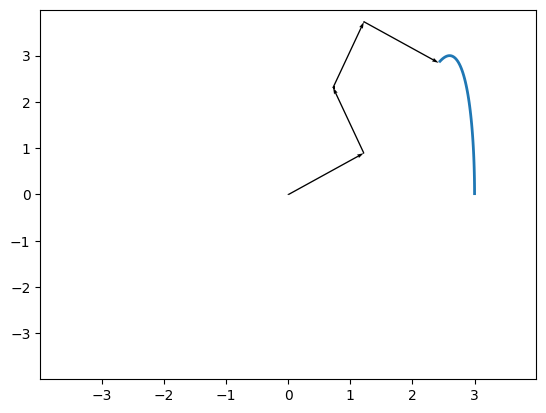

In [6]:
# Terms in summand. rows: sequence index (k), columns frequency index (m)
Z = (B * A)/n
#More expressively: 
# for m in range(0, n):
#     Z[:,m] = A[m] * np.exp(2 * np.pi * 1j * m * ks.squeeze()/n)/n
# Plot z_k as partial sums 

num = 50                     # Element of z sequence to plot
def Z2uvxy(Z, num):
        U = Z[num,:].real
        V = Z[num,:].imag
        X = np.cumsum(U)
        Y = np.cumsum(V)
        X = np.append(0, X)
        Y = np.append(0, Y)
        X = X[:-1]
        Y = Y[:-1]
        return U, V, X, Y

# Start of figures
fig, ax = plt.subplots(1, 1)
# Add line
abs_lim = np.max(np.abs(np.cumsum(Z, 1)))
# abs_lim = np.max(np.abs([x,y]))
plt.xlim(-abs_lim, abs_lim)
plt.ylim(-abs_lim, abs_lim)

# ax.axis('equal')
line, = ax.plot(x[0:num],y[0:num], lw=2)

U, V, X, Y = Z2uvxy(Z, num)
# Add quivers
Q = ax.quiver(X, Y, U, V, angles = 'xy',units='xy', scale_units='xy', scale=1)


We can plot the entire sequence as an animation to visualize $z_k$ in terms of the scaled $\Psi_m(k)$ components, each having a constant rate of rotation. In this animation, we can see how the $z_k$ sequence has a much lower dimensional representation in terms of only a few basis functions, as primarily only a few rotating vectors contribute to the $z_k$ trajectory.

In [ ]:
# Animate all z_k terms
anim = fr.animate_dft(x, y)
plt.close()

from IPython.display import HTML
HTML(anim.to_jshtml())